# Algoritmos de Ensemble Learning para Análise Preditiva acerca de Desastres Naturais

### Objetivos do Projeto:


*   Carregar a base de dados: informações gerais da base de dados original
*   Pré-processamento: limpeza, normalização e formatação dos dados
*   Exploração do dataset
*   Aplicação dos algoritmos: Separação em treino e teste, aplicar o algoritmo com aplicação e MSE por algoritmo,
*   Validação do Algoritmo









# Visão Geral do Dataset
A seguir, algumas informações gerais sobre os dados da base EM - DAT: The International Disaster Database, como número de colunas/atributos, algumas informações estatísticas e tipos de dados.



In [ ]:
# Acessando a base de dados salvos no google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Utilizando as bibliotecas os e pandas para verificar os arquivos na pasta do drive

import os
import pandas as pd

# Caminho para a pasta no Drive
folder_path = '/content/drive/MyDrive/Colab Notebooks/datasetTrabFinal'

# Listar os arquivos na pasta
files = os.listdir(folder_path)
print(files)


['public_emdat_incl_hist_2024-07-15.xlsx', 'public_emdat_incl_hist_2024-07-15.csv']


In [ ]:
# Especificar o caminho para o arquivo Excel
excel_file = '/content/drive/MyDrive/Colab Notebooks/datasetTrabFinal/public_emdat_incl_hist_2024-07-15.xlsx'

# Ler o arquivo Excel
df_excel = pd.read_excel(excel_file)
#print(df_excel.head())

In [ ]:
# Convertendo o arquivo para .csv
csv_file = '/content/drive/MyDrive/Colab Notebooks/datasetTrabFinal/public_emdat_incl_hist_2024-07-15.csv'
df_excel.to_csv(csv_file, index=False)

# Lendo os arquivos .csv e mostrando as 5 primeiras linhas de algumas colunas
data = pd.read_csv(csv_file)
print(data.head())

          DisNo. Historic Classification Key Disaster Group  \
0  1900-0003-USA      Yes    nat-met-sto-tro        Natural   
1  1900-0005-USA      Yes    tec-ind-fir-fir  Technological   
2  1900-0006-JAM      Yes    nat-hyd-flo-flo        Natural   
3  1900-0007-JAM      Yes    nat-bio-epi-vir        Natural   
4  1900-0008-JPN      Yes    nat-geo-vol-ash        Natural   

     Disaster Subgroup      Disaster Type   Disaster Subtype External IDs  \
0       Meteorological              Storm   Tropical cyclone          NaN   
1  Industrial accident  Fire (Industrial)  Fire (Industrial)          NaN   
2         Hydrological              Flood    Flood (General)          NaN   
3           Biological           Epidemic      Viral disease          NaN   
4          Geophysical  Volcanic activity           Ash fall          NaN   

        Event Name  ISO  ... Reconstruction Costs ('000 US$)  \
0              NaN  USA  ...                             NaN   
1              NaN  USA  ...  

In [ ]:
# Mostrando todas as colunas do dataset
data.columns.values

array(['DisNo.', 'Historic', 'Classification Key', 'Disaster Group',
       'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype',
       'External IDs', 'Event Name', 'ISO', 'Country', 'Subregion',
       'Region', 'Location', 'Origin', 'Associated Types',
       'OFDA/BHA Response', 'Appeal', 'Declaration',
       "AID Contribution ('000 US$)", 'Magnitude', 'Magnitude Scale',
       'Latitude', 'Longitude', 'River Basin', 'Start Year',
       'Start Month', 'Start Day', 'End Year', 'End Month', 'End Day',
       'Total Deaths', 'No. Injured', 'No. Affected', 'No. Homeless',
       'Total Affected', "Reconstruction Costs ('000 US$)",
       "Reconstruction Costs, Adjusted ('000 US$)",
       "Insured Damage ('000 US$)", "Insured Damage, Adjusted ('000 US$)",
       "Total Damage ('000 US$)", "Total Damage, Adjusted ('000 US$)",
       'CPI', 'Admin Units', 'Entry Date', 'Last Update'], dtype=object)

### Informações sobre o Dataset:
A base adquirida do EM - DAT: The International Disaster Database possui informações de desastres tanto naturais quanto tecnológicos (sendo apenas a primeira caterogia alvo deste estudo).
Antes da limpeza, a base possui 26632 entradas/linhas, 46 colunas/atributos e dados dos atributos tipo "objeto", float e inteiro. Note que há muitas colunas com poucos valores não nulos, como o "River Basin"  e "Reconstruction Costs ('000 US$").


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26632 entries, 0 to 26631
Data columns (total 46 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   DisNo.                                     26632 non-null  object 
 1   Historic                                   26632 non-null  object 
 2   Classification Key                         26632 non-null  object 
 3   Disaster Group                             26632 non-null  object 
 4   Disaster Subgroup                          26632 non-null  object 
 5   Disaster Type                              26632 non-null  object 
 6   Disaster Subtype                           26632 non-null  object 
 7   External IDs                               2419 non-null   object 
 8   Event Name                                 8352 non-null   object 
 9   ISO                                        26632 non-null  object 
 10  Country               

### Valores Nulos no Dataset:
Alguns atributos possuem poucos valores preenchidos no dataset, como os relacionados com custos de reconstrução, custo de danos totais e números de pessoas afetadas, sem lar e feridas, por exemplo.

In [ ]:
data.isna().sum()

,0
DisNo.,0
Historic,0
Classification Key,0
Disaster Group,0
Disaster Subgroup,0
Disaster Type,0
Disaster Subtype,0
External IDs,24213
Event Name,18280
ISO,0


# Pré-processamento dos Dados

### Limpeza dos Dados
Devido a grande dimensão da base e sua abrangência, algumas colunas e estradas serão desconsideradas para a aplicação do algoritmo, pois não apresentam informações relevantes para o tema do projeto, ou não são alvo do estudo de desastres naturais (por exemplo desastres tecnológicos ou bioloógicos). Em seguida, será feito o preenchimento ou eliminação de algumas linhas de colunas que estão vazias, de acordo com alguns critérios estabelecidos.

A limpeza começará pela eliminação de entradas que não são o alvo do estudo deste trabalho, como a entrada "Technological" do atributo Disaster Group.

In [ ]:
# Identificar os índices das linhas a serem removidas
remove_index = data[data['Disaster Group'] == 'Technological'].index

# Remover as linhas com esses índices
new_data = data.drop(remove_index)
print(new_data)

              DisNo. Historic Classification Key Disaster Group  \
0      1900-0003-USA      Yes    nat-met-sto-tro        Natural   
2      1900-0006-JAM      Yes    nat-hyd-flo-flo        Natural   
3      1900-0007-JAM      Yes    nat-bio-epi-vir        Natural   
4      1900-0008-JPN      Yes    nat-geo-vol-ash        Natural   
5      1900-0009-TUR      Yes    nat-geo-ear-gro        Natural   
...              ...      ...                ...            ...   
26627  2024-9075-COL       No    nat-cli-dro-dro        Natural   
26628  2024-9131-ZMB       No    nat-cli-dro-dro        Natural   
26629  2024-9135-MHL       No    nat-cli-dro-dro        Natural   
26630  2024-9197-MWI       No    nat-cli-dro-dro        Natural   
26631  2024-9197-ZWE       No    nat-cli-dro-dro        Natural   

      Disaster Subgroup      Disaster Type  Disaster Subtype  \
0        Meteorological              Storm  Tropical cyclone   
2          Hydrological              Flood   Flood (General)   
3  

In [ ]:
# Também serão removidas as entradas "Biological" e "Extra-terrestrial" do atributo Disaster Subgroup.

# Identificar os índices das linhas a serem removidas
remove_indices_subgroup = new_data[new_data['Disaster Subgroup'].isin(['Biological', 'Extra-terrestrial'])].index

# Remover as linhas com esses índices
new_df = new_data.drop(remove_indices_subgroup)
print(new_df)

              DisNo. Historic Classification Key Disaster Group  \
0      1900-0003-USA      Yes    nat-met-sto-tro        Natural   
2      1900-0006-JAM      Yes    nat-hyd-flo-flo        Natural   
4      1900-0008-JPN      Yes    nat-geo-vol-ash        Natural   
5      1900-0009-TUR      Yes    nat-geo-ear-gro        Natural   
6      1900-9001-IND      Yes    nat-cli-dro-dro        Natural   
...              ...      ...                ...            ...   
26627  2024-9075-COL       No    nat-cli-dro-dro        Natural   
26628  2024-9131-ZMB       No    nat-cli-dro-dro        Natural   
26629  2024-9135-MHL       No    nat-cli-dro-dro        Natural   
26630  2024-9197-MWI       No    nat-cli-dro-dro        Natural   
26631  2024-9197-ZWE       No    nat-cli-dro-dro        Natural   

      Disaster Subgroup      Disaster Type  Disaster Subtype  \
0        Meteorological              Storm  Tropical cyclone   
2          Hydrological              Flood   Flood (General)   
4  

Com relação a eliminação de colunas, alguns fatores serão levados em consideração.

Primeiramente, serão excluídos as colunas com informações que apresentam pouca ou nenhuma relevancia para o estudo.

In [ ]:
# Remover as colunas especificadas
remove_colunas = ['DisNo.', 'External IDs', 'Classification Key', 'Event Name', 'River Basin', 'CPI', 'Admin Units', 'Reconstruction Costs (\'000 US$)', 'Insured Damage (\'000 US$)', 'Total Damage, Adjusted (\'000 US$)', 'Entry Date', 'Last Update']
df_novo = new_df.drop(columns=remove_colunas)

print(df_novo)



      Historic Disaster Group Disaster Subgroup      Disaster Type  \
0          Yes        Natural    Meteorological              Storm   
2          Yes        Natural      Hydrological              Flood   
4          Yes        Natural       Geophysical  Volcanic activity   
5          Yes        Natural       Geophysical         Earthquake   
6          Yes        Natural    Climatological            Drought   
...        ...            ...               ...                ...   
26627       No        Natural    Climatological            Drought   
26628       No        Natural    Climatological            Drought   
26629       No        Natural    Climatological            Drought   
26630       No        Natural    Climatological            Drought   
26631       No        Natural    Climatological            Drought   

       Disaster Subtype  ISO                   Country  \
0      Tropical cyclone  USA  United States of America   
2       Flood (General)  JAM               

In [ ]:
# Quantidade de variáveis nulas no dataset novo com 15518 linhas
df_novo.isna().sum()

,0
Historic,0
Disaster Group,0
Disaster Subgroup,0
Disaster Type,0
Disaster Subtype,0
ISO,0
Country,0
Subregion,0
Region,0
Location,1538


Para o segundo critério de exclusão, seráo excluídas colunas com no mínimo 60% de dados nulos/faltantes (a partir de 9311 dados faltantes).
O projeto também não irá lidar com séries temporais, logo as colunas de datas serão excluídas.

Total Damage será mantida por que é uma coluna de interese para o estudo.

In [ ]:
# Remover as colunas especificadas
remove_colunas = ['Origin', 'Associated Types', 'AID Contribution (\'000 US$)', 'Magnitude', 'Latitude', 'Longitude', 'No. Injured', 'No. Homeless', 'Reconstruction Costs, Adjusted (\'000 US$)', 'Insured Damage, Adjusted (\'000 US$)', 'ISO', 'Start Year', 'Start Month', 'Start Day', 'End Year', 'End Month', 'End Day']
df_cleaned = df_novo.drop(columns=remove_colunas)

print(df_cleaned)


      Historic Disaster Group Disaster Subgroup      Disaster Type  \
0          Yes        Natural    Meteorological              Storm   
2          Yes        Natural      Hydrological              Flood   
4          Yes        Natural       Geophysical  Volcanic activity   
5          Yes        Natural       Geophysical         Earthquake   
6          Yes        Natural    Climatological            Drought   
...        ...            ...               ...                ...   
26627       No        Natural    Climatological            Drought   
26628       No        Natural    Climatological            Drought   
26629       No        Natural    Climatological            Drought   
26630       No        Natural    Climatological            Drought   
26631       No        Natural    Climatological            Drought   

       Disaster Subtype                   Country  \
0      Tropical cyclone  United States of America   
2       Flood (General)                   Jamaica   


In [ ]:
df_cleaned.isna().sum()

,0
Historic,0
Disaster Group,0
Disaster Subgroup,0
Disaster Type,0
Disaster Subtype,0
Country,0
Subregion,0
Region,0
Location,1538
OFDA/BHA Response,0


Como as únicas colunas que estão com menos de 10% de dados faltantes são Location e Magnitude Scale, essas linhas serão eliminadas. As linhas com valores nulos de Total Deaths também serão eliminadas, pois é a variável alvo.

In [ ]:
new_df_cleaned = df_cleaned.dropna(subset=['Location', 'Magnitude Scale', 'Total Deaths',])
print(new_df_cleaned)

      Historic Disaster Group Disaster Subgroup Disaster Type  \
0          Yes        Natural    Meteorological         Storm   
2          Yes        Natural      Hydrological         Flood   
5          Yes        Natural       Geophysical    Earthquake   
6          Yes        Natural    Climatological       Drought   
7          Yes        Natural    Climatological       Drought   
...        ...            ...               ...           ...   
26611       No        Natural    Meteorological         Storm   
26612       No        Natural    Meteorological         Storm   
26613       No        Natural    Meteorological         Storm   
26614       No        Natural    Climatological      Wildfire   
26618       No        Natural    Meteorological         Storm   

       Disaster Subtype                   Country  \
0      Tropical cyclone  United States of America   
2       Flood (General)                   Jamaica   
5       Ground movement                   Türkiye   
6      

In [ ]:
new_df_cleaned.isna().sum()

,0
Historic,0
Disaster Group,0
Disaster Subgroup,0
Disaster Type,0
Disaster Subtype,0
Country,0
Subregion,0
Region,0
Location,0
OFDA/BHA Response,0


In [ ]:
new_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9108 entries, 0 to 26618
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Historic                 9108 non-null   object 
 1   Disaster Group           9108 non-null   object 
 2   Disaster Subgroup        9108 non-null   object 
 3   Disaster Type            9108 non-null   object 
 4   Disaster Subtype         9108 non-null   object 
 5   Country                  9108 non-null   object 
 6   Subregion                9108 non-null   object 
 7   Region                   9108 non-null   object 
 8   Location                 9108 non-null   object 
 9   OFDA/BHA Response        9108 non-null   object 
 10  Appeal                   9108 non-null   object 
 11  Declaration              9108 non-null   object 
 12  Magnitude Scale          9108 non-null   object 
 13  Total Deaths             9108 non-null   float64
 14  No. Affected             552

In [ ]:
# Como os atributos No. Affected, Total Affected e Total Damage possuem certo grau de correlação entre eles, o algoritmo de kNN será utilizado para
# preencher os valores faltantes dessas colunas a fim de proporcionar imputações mais precisas.


from sklearn.impute import KNNImputer

# Colunas para imputar
colunas_alvo = ['No. Affected', 'Total Affected', 'Total Damage (\'000 US$)']

# Inicializando o imputador KNN
imputador_knn = KNNImputer(n_neighbors=5)

# Aplicar o imputador às colunas selecionadas
new_df_cleaned[colunas_alvo] = imputador_knn.fit_transform(new_df_cleaned[colunas_alvo])

# Converter os valores para inteiro após arrendondar, já que os dados originais eram floats mas não possuíam valores contínuos
new_df_cleaned[colunas_alvo] = new_df_cleaned[colunas_alvo].round().astype(int)

# Verificar o resultado
print(new_df_cleaned[colunas_alvo].isnull().sum())


No. Affected               0
Total Affected             0
Total Damage ('000 US$)    0
dtype: int64


<ipython-input-17-227a4f41901a>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_cleaned[colunas_alvo] = imputador_knn.fit_transform(new_df_cleaned[colunas_alvo])
<ipython-input-17-227a4f41901a>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_cleaned[colunas_alvo] = new_df_cleaned[colunas_alvo].round().astype(int)


In [ ]:
# Agora todos os valores estão preenchidos no dataset.
new_df_cleaned.isna().sum()

,0
Historic,0
Disaster Group,0
Disaster Subgroup,0
Disaster Type,0
Disaster Subtype,0
Country,0
Subregion,0
Region,0
Location,0
OFDA/BHA Response,0


In [ ]:
new_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9108 entries, 0 to 26618
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Historic                 9108 non-null   object 
 1   Disaster Group           9108 non-null   object 
 2   Disaster Subgroup        9108 non-null   object 
 3   Disaster Type            9108 non-null   object 
 4   Disaster Subtype         9108 non-null   object 
 5   Country                  9108 non-null   object 
 6   Subregion                9108 non-null   object 
 7   Region                   9108 non-null   object 
 8   Location                 9108 non-null   object 
 9   OFDA/BHA Response        9108 non-null   object 
 10  Appeal                   9108 non-null   object 
 11  Declaration              9108 non-null   object 
 12  Magnitude Scale          9108 non-null   object 
 13  Total Deaths             9108 non-null   float64
 14  No. Affected             910

# Formatação dos Dados para o Algoritmo
Visto que não há mais linhas com valores nulos, os dados serão agora formatados para serem posteriormente separados em treino e teste para o algoritmo Random Forest. Os dados do tipo "Objeto" serão tratados com o OneHotEncoder.

In [ ]:
# A coluna Total Deaths que está descrita como float não possui valores contínuos, portanto será convertida para inteiro.

converter_colunas = ['Total Deaths']
new_df_cleaned[converter_colunas] = new_df_cleaned[converter_colunas].astype(int)
new_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9108 entries, 0 to 26618
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Historic                 9108 non-null   object
 1   Disaster Group           9108 non-null   object
 2   Disaster Subgroup        9108 non-null   object
 3   Disaster Type            9108 non-null   object
 4   Disaster Subtype         9108 non-null   object
 5   Country                  9108 non-null   object
 6   Subregion                9108 non-null   object
 7   Region                   9108 non-null   object
 8   Location                 9108 non-null   object
 9   OFDA/BHA Response        9108 non-null   object
 10  Appeal                   9108 non-null   object
 11  Declaration              9108 non-null   object
 12  Magnitude Scale          9108 non-null   object
 13  Total Deaths             9108 non-null   int64 
 14  No. Affected             9108 non-null   int

<ipython-input-20-082b6d0b3dd5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_cleaned[converter_colunas] = new_df_cleaned[converter_colunas].astype(int)


In [ ]:
# Selecionar colunas numéricas inteiras para normalização

from sklearn.preprocessing import MinMaxScaler

# Adicione todas as colunas inteiras aqui, por exemplo:
colunas_inteiro = ['No. Affected', 'Total Affected', 'Total Damage (\'000 US$)']

# Inicialize o MinMaxScaler
escalonador = MinMaxScaler()

# Aplicar a normalização Min-Max
new_df_cleaned[colunas_inteiro] = escalonador.fit_transform(new_df_cleaned[colunas_inteiro])

# Verificar o resultado
print(new_df_cleaned)
#print(new_df_cleaned[colunas_inteiro].describe())

      Historic Disaster Group Disaster Subgroup Disaster Type  \
0          Yes        Natural    Meteorological         Storm   
2          Yes        Natural      Hydrological         Flood   
5          Yes        Natural       Geophysical    Earthquake   
6          Yes        Natural    Climatological       Drought   
7          Yes        Natural    Climatological       Drought   
...        ...            ...               ...           ...   
26611       No        Natural    Meteorological         Storm   
26612       No        Natural    Meteorological         Storm   
26613       No        Natural    Meteorological         Storm   
26614       No        Natural    Climatological      Wildfire   
26618       No        Natural    Meteorological         Storm   

       Disaster Subtype                   Country  \
0      Tropical cyclone  United States of America   
2       Flood (General)                   Jamaica   
5       Ground movement                   Türkiye   
6      

<ipython-input-21-a4048c8c9494>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_cleaned[colunas_inteiro] = escalonador.fit_transform(new_df_cleaned[colunas_inteiro])


In [ ]:
# Há uma alta quantidade de valores únicos para Location, logo essa coluna será removida para não gerar um número alto demais de colunas. Ao contrário de Disaster Group, que só possui 1 valor 'Natural'
new_df_cleaned = new_df_cleaned.drop(columns=['Location', 'Disaster Group'])


In [ ]:
# Convertendo os valores categóricos (tipo "objeto") para um vetor numérico One-Hot (representação binária).

# Selecionar todas as colunas categóricas (do tipo object)
colunas_categoricas = new_df_cleaned.select_dtypes(include=['object']).columns

# Verificar o número de categorias únicas em cada coluna categórica
for col in colunas_categoricas:
    num_unique = new_df_cleaned[col].nunique()
    print(f"{col}: {num_unique} unique values")

#print(colunas_categoricas)

Historic: 2 unique values
Disaster Subgroup: 4 unique values
Disaster Type: 6 unique values
Disaster Subtype: 24 unique values
Country: 208 unique values
Subregion: 17 unique values
Region: 5 unique values
OFDA/BHA Response: 2 unique values
Appeal: 2 unique values
Declaration: 2 unique values
Magnitude Scale: 4 unique values


In [ ]:
# Inicializando o OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False) # sparse = False retorna uma matriz densa

# Ajusta e transforma os dados categóricos
ajusta_dados = encoder.fit_transform(new_df_cleaned[colunas_categoricas])

# Cria um DataFrame com os dados transformados
transforma_dados = pd.DataFrame(ajusta_dados, columns=encoder.get_feature_names_out(colunas_categoricas), index=new_df_cleaned.index)

# Concatena o DataFrame original (sem as colunas categóricas) com o DataFrame codificado
novo_df = pd.concat([new_df_cleaned.drop(columns=colunas_categoricas), transforma_dados], axis=1)


print(novo_df)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


       Total Deaths  No. Affected  Total Affected  Total Damage ('000 US$)  \
0              6000      0.001281        0.000157                 0.000143   
2               300      0.003464        0.002760                 0.004768   
5               140      0.003464        0.002760                 0.004768   
6           1250000      0.003464        0.002760                 0.004768   
7             11000      0.003464        0.002760                 0.004768   
...             ...           ...             ...                      ...   
26611            10      0.003464        0.002760                 0.004768   
26612             1      0.000012        0.000012                 0.002611   
26613             4      0.003464        0.002760                 0.004768   
26614             2      0.000005        0.000005                 0.001062   
26618             5      0.000030        0.000030                 0.013177   

       Historic_No  Historic_Yes  Disaster Subgroup_Climatologi

# Separação dos dados em Treino (80%) e Teste (20%) e definição da variável alvo.
A variável alvo será o número de mortes (Total Deaths) e os dados foram separados em treino (80%) e teste (20%) como solicitado.

In [ ]:
# Separação dos dados em treino e teste.

from sklearn.model_selection import train_test_split

# A coluna 'Total Deaths' é a variável alvo.
X = novo_df.drop(columns=['Total Deaths'])
y = novo_df['Total Deaths']

# Separando os dados em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#verificando as dimensões dos dados de treinamento e teste
X_train.shape, X_test.shape
#y_train.shape, y_test.shape


((7286, 279), (1822, 279))

# Aplicação do modelo Random Forest

In [ ]:
# Aplicação do algoritmo Random Forest

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Inicializando o Random Forest Regressor
rf_modelo = RandomForestRegressor(n_estimators=50, random_state=1)

# Treinando o modelo
rf_modelo.fit(X_train, y_train)

# Fazendo previsões
rf_y_pred = rf_modelo.predict(X_test)

# Avaliando o modelo
print(f"RF Mean Squared Error: {mean_squared_error(y_test, rf_y_pred):.4f}")
print(f"RF R^2 Score: {r2_score(y_test, rf_y_pred):.4f}")

RF Mean Squared Error: 7780413481.8554
RF R^2 Score: 0.0851


#Aplicando RandomizedSearchCV no algoritmo de Random Forest Regressor

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Definindo o espaço de parâmetros para RandomizedSearchCV
param_distributions = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'random_state': [1]  # Semente para reprodutibilidade
}

# Inicializando o Random Forest Regressor
rf_SCV_modelo = RandomForestRegressor()

# Configurando o RandomizedSearchCV
random_search_rf = RandomizedSearchCV(
    estimator=rf_SCV_modelo,
    param_distributions=param_distributions,
    n_iter=50,  # Número de combinações de parâmetros a serem testadas
    scoring='neg_mean_squared_error',  # Métrica a ser otimizada
    cv=3,  # Número de folds na validação cruzada
    verbose=1,  # Verbosidade durante o ajuste
    random_state=1,
    n_jobs=-1  # Utilizar todos os núcleos disponíveis
)

# Ajustando o modelo com RandomizedSearchCV
random_search_rf.fit(X_train, y_train)

# Melhor combinação de parâmetros encontrada
print("Melhores Parâmetros Encontrados:")
print(random_search_rf.best_params_)

# Melhor modelo encontrado
best_rf_model = random_search_rf.best_estimator_

# Fazendo previsões com o melhor modelo
rf_SCV_y_pred = best_rf_model.predict(X_test)

# Avaliando o modelo
mse = mean_squared_error(y_test, rf_SCV_y_pred)
r2 = r2_score(y_test, rf_SCV_y_pred)
print(f"RF Mean Squared Error: {mse:.4f}")
print(f"RF R^2 Score: {r2:.4f}")

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Melhores Parâmetros Encontrados:
{'random_state': 1, 'n_estimators': 150, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 20, 'bootstrap': True}
RF Mean Squared Error: 7602348400.8124
RF R^2 Score: 0.1060


# Aplicação do Modelo XGBoost

In [ ]:
pip install xgboost

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# Definindo os parâmetros do modelo
params = {
    'objective': 'reg:squarederror',  # Objetivo de regressão
    'max_depth': 6,  # Profundidade máxima da árvore
    'eta': 0.1,  # Taxa de aprendizado
    'subsample': 0.8,  # Subamostragem dos dados de treino para cada árvore
    'colsample_bytree': 0.8,  # Subamostragem das features para cada árvore
    'n_estimators': 100,  # Número de árvores a serem construídas
    'seed': 1  # Semente para reprodutibilidade
}

# Inicializando o XGBRegressor com os parâmetros
xgb_model = xgb.XGBRegressor(
    objective=params['objective'],
    max_depth=params['max_depth'],
    learning_rate=params['eta'],
    subsample=params['subsample'],
    colsample_bytree=params['colsample_bytree'],
    n_estimators=params['n_estimators'],
    seed=params['seed']
)

# Treinando o modelo
xgb_model.fit(X_train, y_train)

# Fazendo previsões
xg_y_pred = xgb_model.predict(X_test)

# Avaliando o modelo
mse = mean_squared_error(y_test, xg_y_pred)
r2 = r2_score(y_test, xg_y_pred)
print(f"XG Mean Squared Error: {mse:.4f}")
print(f"XG R^2 Score: {r2:.4f}")

XG Mean Squared Error: 8262394592.8608
XG R^2 Score: 0.0284


# Aplicação do Modelo AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Definindo o modelo base
base_model = DecisionTreeRegressor(max_depth=3)

# Definindo o modelo AdaBoost
ada_model = AdaBoostRegressor(base_model, n_estimators=50, random_state=1)

# Treinando o modelo
ada_model.fit(X_train, y_train)

# Fazendo previsões
ada_y_pred = ada_model.predict(X_test)

# Avaliando o modelo
print(f"ADA Mean Squared Error: {mean_squared_error(y_test, ada_y_pred):.4f}")
print(f"ADA R^2 Score: {r2_score(y_test, ada_y_pred):.4f}")

ADA Mean Squared Error: 8438869282.6684
ADA R^2 Score: 0.0077


#Aplicação do Algoritmo de Stacking


In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

base_models = [
    ('rf', RandomForestRegressor(n_estimators=50, random_state=1)),
    ('gb', GradientBoostingRegressor(n_estimators=50, random_state=1))
]

# Definindo o meta-modelo
meta_model = LinearRegression()

# Criando o modelo Stacking
stacking_model = StackingRegressor(estimators=base_models, final_estimator=meta_model, cv=5)

# Treinando o modelo
stacking_model.fit(X_train, y_train)

# Fazendo previsões
stacking_y_pred = stacking_model.predict(X_test)

# Avaliando o modelo
print(f"Stacking Mean Squared Error: {mean_squared_error(y_test, stacking_y_pred):.4f}")
print(f"Stacking R^2 Score: {r2_score(y_test, stacking_y_pred):.4f}")

Stacking Mean Squared Error: 8487781364.7079
Stacking R^2 Score: 0.0019


In [ ]:
# # Calculando a importância das características
# importances = modelo.feature_importances_
# feature_names = X_train.columns
# feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# # Ordenando por importância
# feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# print(feature_importance_df.head(20))

                              Feature  Importance
9             Total Damage ('000 US$)    0.424887
7                        No. Affected    0.112729
34    Disaster Subtype_Riverine flood    0.071988
1                          Start Year    0.047757
4                            End Year    0.047628
27   Disaster Subtype_Flood (General)    0.037833
348                     Country_Haiti    0.028686
8                      Total Affected    0.028113
6                             End Day    0.024723
128                           ISO_HTI    0.023716
3                           Start Day    0.018620
390                   Country_Myanmar    0.018074
508               Magnitude Scale_Km2    0.011928
301                     Country_China    0.010441
167                           ISO_MMR    0.008231
5                           End Month    0.007303
2                         Start Month    0.006453
502              OFDA/BHA Response_No    0.005114
78                            ISO_CHN    0.004371


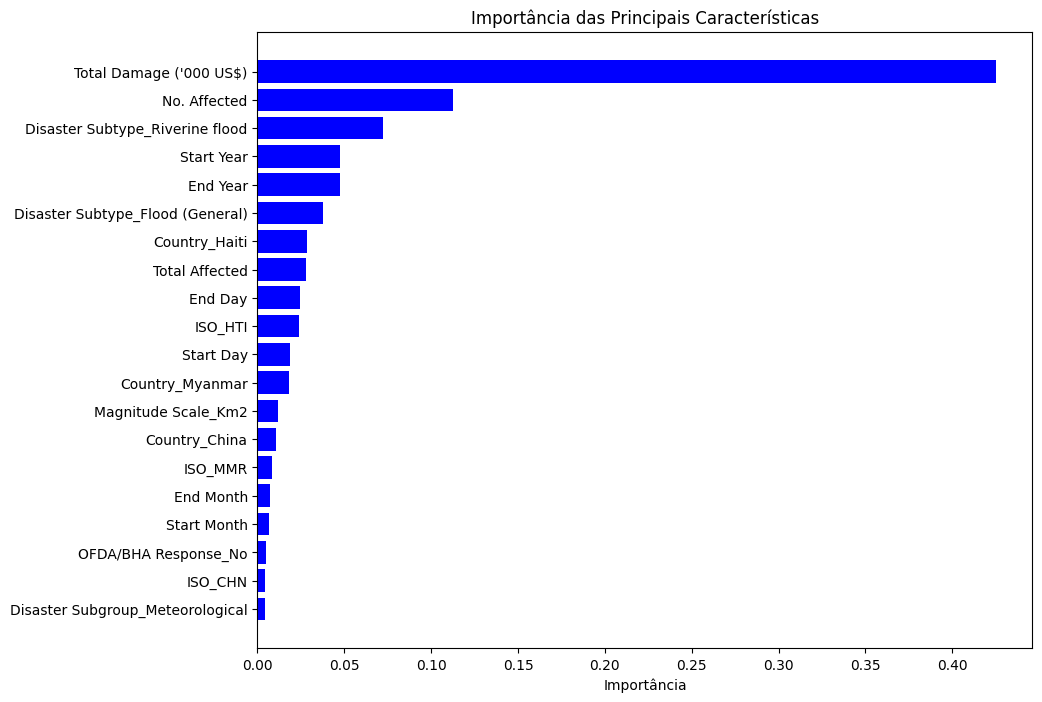

In [ ]:
# # Visualizando a importância das características
# plt.figure(figsize=(10, 8))
# plt.barh(feature_importance_df['Feature'][:20], feature_importance_df['Importance'][:20], color='b', align='center')
# plt.gca().invert_yaxis()
# plt.xlabel('Importância')
# plt.title('Importância das Principais Características')
# plt.show()

# Futuro do projeto
Apesar da avaliação do modelo ter sido instatisfatória a primeiro momento, há outros estudos na literatura que utiliazm da mesma base de dados para algoritmos de machine learning então possivelmente essa avaliação se deu por motivos de manipulação talvez incorreta ou incompleta do dataset, que será posteriormente estudado e avaliado em contjunto da monitoria.

Além disso, também é esperado que mais métodos ensembles além do Random Forest,como AdaBoost, XGBoost e Stacking sejam adicionados ao projeto.
Para uma melhor performance, um otimizador de parâmetros, como o Grid Search, deverá ser implementado para encontrar a melhor combinação de hiperparâmetros e melhorar o desempenho do algoritmo.

Outras técnincas de avaliação para os modelos deverão ser adicionadas ao projeto, como o Cross Validation.

